In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:/Datasets/depression_dataset_reddit_cleaned.csv')

In [3]:
data.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [4]:
data.tail()

,clean_text,is_depression
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0
7730,slept wonderfully finally tried swatching for ...,0


In [5]:
data.shape

(7731, 2)

In [8]:
data[data['is_depression']==1]['clean_text'].head(1)

0    we understand that most people who reply immed...
Name: clean_text, dtype: object

0    3900
1    3831
Name: is_depression, dtype: int64


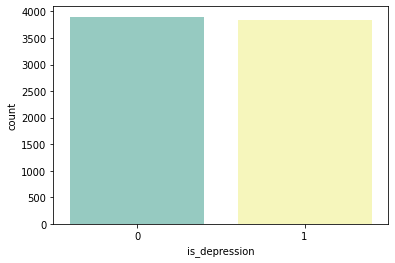

In [12]:
print(data['is_depression'].value_counts())

sns.countplot(x=data['is_depression'], palette='Set3');

In [22]:
import nltk
import re

nltk.download('omw-1.4')
nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # проводит лемматизацию
from nltk.corpus import stopwords

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\илья\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\илья\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\илья\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\илья\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Очистка текста от неалфавитных символов.**\
Функция re.sub позволяет заменить все, что подходит под шаблон на указанную строку.
Например, вот так можно заменить все, что не является словами на пробелы:

In [ ]:
re.sub("[^a-zA-Z]"," ",text)

**Токенизация.**\
Данный метод позволяет разделить текст на так называемые токены, то есть на слова или предложения.

In [ ]:
nltk.word_tokenize(text,language = "english")

**Лемматизация.**\
Позволяет привести словоформу к лемме — ее нормальной (словарной) форме. Другими словами, лемматизация схожа с выделением основы каждого слова в предложении. Она обычно выполняется простым поиском форм в таблице. Кроме того, можно добавить некоторые пользовательские правила для анализа слов.

In [20]:
lemmatize = nltk.WordNetLemmatizer()

In [ ]:
lemmatize.lemmatize(word) for word in text

**Удаление стоп-слов.**\
Под стоп-словами обычно понимаются артикли, междометия, союзы и т.д., которые не несут смысловой нагрузки. При применении алгоритмов машинного обучения такие слова могут добавить много шума, поэтому лучше избавляться от них. В NLTK есть предустановленный список стоп-слов.

In [ ]:
lemmatize.lemmatize(word) for word in text if not word in set(stopwords.words("stopwords"))

**Векторизация текста или преобразование текста в численную форму.**\
Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры. Данная стратегия называется представлением «Мешок слов». Документы описываются вхождениями слов, при этом полностью игнорируется информация об относительном положении слов в документе. По мешку слов находят количество появлений каждого слова во всем тексте. 

In [23]:
new_text = []
for i in data.clean_text:
    #удаляем неалфавитные символы
    text = re.sub("[^a-zA-Z]"," ",i) 
    # токенизируем слова
    text = nltk.word_tokenize(text,language = "english")
    # лемматирзируем слова
    text = [lemmatize.lemmatize(word) for word in i]
    # соединяем слова
    text = "".join(text)
    new_text.append(text)

In [24]:
# импортируем модуль
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words="english")
# проводим преобразование текста
matrix = count.fit_transform(new_text).toarray()

Также популярным методом для векторизации текста является метод TF-IDF, который является статистической мерой для оценки важности слова в документе.

В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.

<img src="https://habrastorage.org/getpro/habr/upload_files/2a1/d10/488/2a1d104883345af93474d4ebb6633e2a.png">

In [25]:
# импортируем модуль TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
#преобразуем текст
values = tfidf_vectorizer.fit_transform(new_text)

In [29]:
X=matrix
y = data["is_depression"].values
#Далее разделим выборку на тестовую и обучающую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result_bayes = nb.fit(x_train, y_train)
nb.score(x_test,y_test)

0.8436520376175548

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result_logreg = logreg.fit(x_train, y_train)
logreg.score(x_test,y_test)

0.9565047021943573

In [ ]:
from sklearn import svm
metodsvm = svm.SVC()
result_svm = metodsvm.fit(x_train, y_train)
metodsvm.score(x_test, y_test)

In [ ]:
#адаптивный бустинг

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

modelClf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)

modelclf_fit = modelClf.fit(X_train, y_train)
modelClf.score(X_valid, y_valid)

In [ ]:
# градиентный бустинг

from sklearn.model_selection import train_test_split
# импортируем библиотеку
from sklearn.ensemble import GradientBoostingClassifier

modelClf = GradientBoostingClassifier(max_depth=2, n_estimators=150,random_state=12, learning_rate=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.3, random_state=12)

modelClf.fit(X_train, y_train)
modelClf.score(X_valid, y_valid)